## **1. Import Libraries**

In [1]:
import numpy as np
import pandas as pd
from sklearn.neighbors import KNeighborsRegressor
import matplotlib.pyplot as plt

In [2]:
!gdown 1YqJsIFVH5v2AMeW4L0k_zYack5EmRU0q

Downloading...
From: https://drive.google.com/uc?id=1YqJsIFVH5v2AMeW4L0k_zYack5EmRU0q
To: /content/Salary_Data_simple.csv
100% 154/154 [00:00<00:00, 483kB/s]


## **2. Load and Prepare the Data**

In [ ]:
df = pd.read_csv('/content/Salary_Data_simple.csv')
df

,Experience,Salary
0,1.0,0.0
1,1.5,0.0
2,2.0,0.0
3,2.5,0.0
4,3.0,60.0
5,3.5,64.0
6,4.0,55.0
7,4.5,61.0
8,5.0,66.0
9,5.5,83.0


In [ ]:
X = df[['Experience']].values
y = df['Salary'].values
print(type(X))
print(X.shape)

<class 'numpy.ndarray'>
(14, 1)


## **3. Manual Prediction: KNN Regression**

#### Define the New Data Point

In [ ]:
x_test = np.array([[5.3]])
k = 3

#### Step 1: Calculate Distances

In [ ]:

distances = abs(X-x_test)
print(distances)
distances = distances.flatten()
print(distances)
for i in range(len(distances)):
    print(f"Distance to point {X[i][0]:.1f} is {distances[i]:.2f}")

[[4.3]
 [3.8]
 [3.3]
 [2.8]
 [2.3]
 [1.8]
 [1.3]
 [0.8]
 [0.3]
 [0.2]
 [0.7]
 [1.2]
 [1.7]
 [2.2]]
[4.3 3.8 3.3 2.8 2.3 1.8 1.3 0.8 0.3 0.2 0.7 1.2 1.7 2.2]
Distance to point 1.0 is 4.30
Distance to point 1.5 is 3.80
Distance to point 2.0 is 3.30
Distance to point 2.5 is 2.80
Distance to point 3.0 is 2.30
Distance to point 3.5 is 1.80
Distance to point 4.0 is 1.30
Distance to point 4.5 is 0.80
Distance to point 5.0 is 0.30
Distance to point 5.5 is 0.20
Distance to point 6.0 is 0.70
Distance to point 6.5 is 1.20
Distance to point 7.0 is 1.70
Distance to point 7.5 is 2.20


#### Find the k-Nearest Neighbors

In [ ]:
top_k_indices = None
top_k_indices = np.argsort(distances)[:k]
print(f"The indices of the {k} nearest neighbors are: {top_k_indices}")
for i, index in enumerate(top_k_indices):
  print(f"Neighbor {i}: Experience = {X[index][0]}, Salary = {y[index]}")

The indices of the 3 nearest neighbors are: [ 9  8 10]
Neighbor 0: Experience = 5.5, Salary = 83.0
Neighbor 1: Experience = 5.0, Salary = 66.0
Neighbor 2: Experience = 6.0, Salary = 93.0


In [ ]:
min = y[top_k_indices[0]]
min

np.float64(83.0)

#### Average Their Values

In [ ]:
nearest_neighbor_salaries = None
manual_prediction = None

nearest_neighbor_salaries = y[top_k_indices]
print(nearest_neighbor_salaries)
manual_prediction = np.mean(nearest_neighbor_salaries)

print(f"Salaries of the nearest neighbors: {nearest_neighbor_salaries}")
print(f"The average of these salaries is: ({nearest_neighbor_salaries[0]} + {nearest_neighbor_salaries[1]} + {nearest_neighbor_salaries[2]}) / 3 = {manual_prediction:.2f}")
print(f"Manually Predicted Salary: {manual_prediction:.2f}")

[83. 66. 93.]
Salaries of the nearest neighbors: [83. 66. 93.]
The average of these salaries is: (83.0 + 66.0 + 93.0) / 3 = 80.67
Manually Predicted Salary: 80.67


## **4. Visualization**

In [ ]:
nearest_neighbors_X=X[top_k_indices]
nearest_neighbors_y=y[top_k_indices]

model=KNeighborsRegressor(n_neighbors=k)
model.fit(X,y)
sklearn_prediction=model.predict(x_test)
plt.figure(figsize=(10,6))
plt.scatter(X,y,color='blue',label='Original Data')
plt.scatter(x_test,sklearn_prediction,color='red',marker='x',s=100,label=f'Test Point ({x_test[0][0]} years)')
plt.scatter(nearest_neighbors_X,nearest_neighbors_y,facecolors='none',edgecolors='red',s=200,label=f'{k}-Nearest Neighbors')

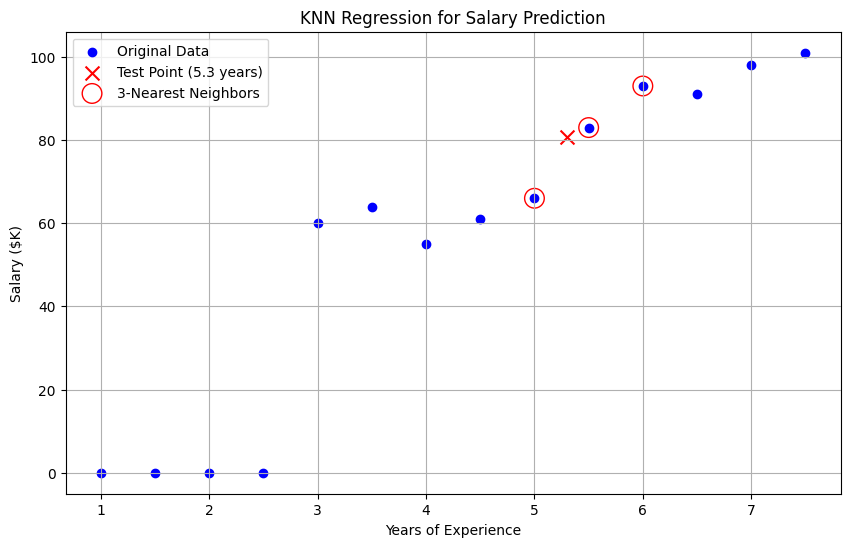

In [ ]:
nearest_neighbors_X = X[top_k_indices]
nearest_neighbors_y = y[top_k_indices]

model = KNeighborsRegressor(n_neighbors = k)
model.fit(X, y)

sklearn_prediction = model.predict(x_test)
plt.figure(figsize=(10, 6))
plt.scatter(X, y, color='blue', label='Original Data')
plt.scatter(x_test, sklearn_prediction, color='red', marker='x', s=100, label=f'Test Point ({x_test[0,0]} years)')

plt.scatter(nearest_neighbors_X, nearest_neighbors_y,
            facecolors='none', edgecolors='red', s=200, label=f'{k}-Nearest Neighbors')

plt.title('KNN Regression for Salary Prediction')
plt.xlabel('Years of Experience')
plt.ylabel('Salary ($K)')
plt.legend()
plt.grid(True)
plt.show()